# <font color='Blue'>Task # 2 To Explore Supervised Machine Learning

### <font color='Blue'>In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas_profiling
import os
os.chdir(r"C:\Users\Rahul\Desktop\spark intern\task2")
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split 

In [2]:
data = pd.read_excel(r"C:\Users\Rahul\Desktop\spark intern\task2\task2.xlsx")

# data Inspection

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Profiling using pandas profiling

In [4]:
report = pandas_profiling.ProfileReport(data)

In [5]:
report

In [22]:
# saving file
report.to_file(output_file = 'profilereport_task2.html')

# No missing values in the dataset

In [7]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# visualising the data

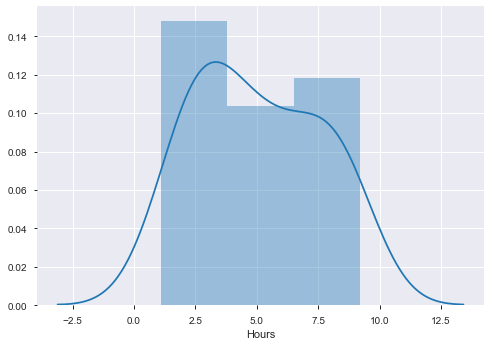

In [8]:
sns.distplot(data.Hours)
plt.show()

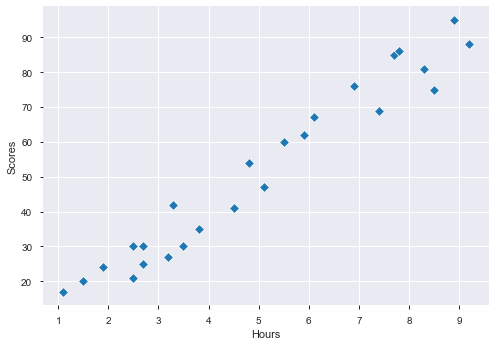

In [9]:
sns.scatterplot(x="Hours", y="Scores",marker="D", data=data)
plt.show()

# Distribution of variables

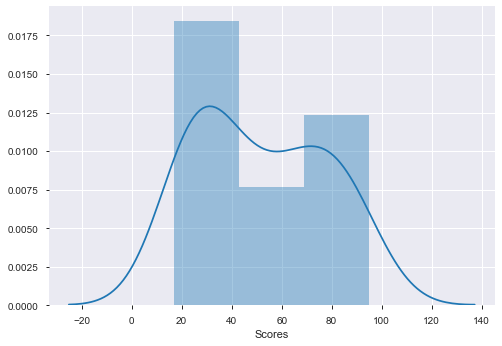

In [10]:
sns.distplot(data.Scores)
plt.show()

# Apply log transformation: log is rescalling the data and making the distribution normal

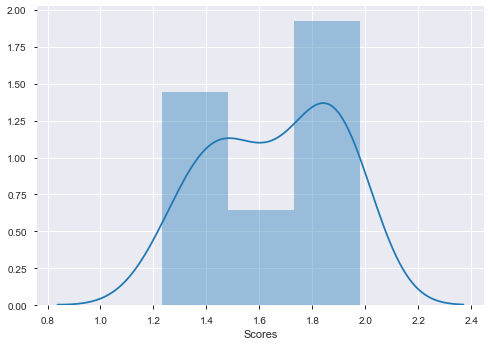

In [11]:
# Distribution of variables
sns.distplot(np.log10(data['Scores']))
plt.show()

# Linearity: correlation matrix (ranges from 1 to -1)

In [12]:
corrm = data.corr()
corrm.to_csv('corrm.csv')
corrm

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# visualize correlation matrix in Seaborn using a heatmap

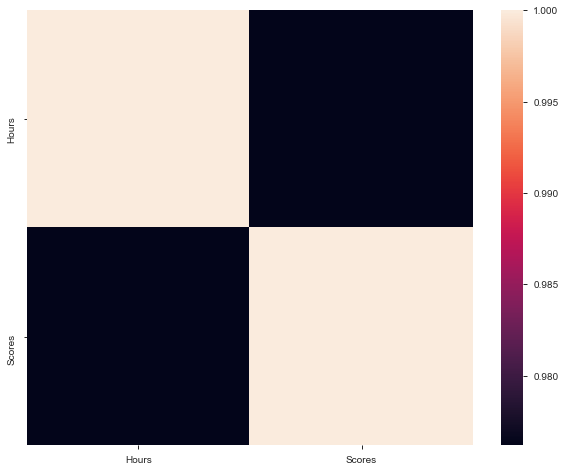

In [13]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr())
plt.show()

# Creating dependent and independent variable

In [14]:
X = data.loc[:,['Hours']]
Y = data.loc[:,['Scores']]

# Creating Train and Test Dataset

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

# Initializing Model

In [16]:
linreg_model = linear_model.LinearRegression()

# Fitting Model

In [17]:
linreg_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Predict the sales on the training data

In [18]:
X_train['pred_scores'] = linreg_model.predict(X_train)

C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Predict the sales on the testing data

In [19]:
X_test['pred_scores'] = linreg_model.predict(X_test)

C:\Users\Rahul\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# Accuracy metrics (a. MAPE: Mean Absolute Percentage Error)

In [20]:
MAPE_train = np.mean(np.abs((Y_train["Scores"] - X_train['pred_scores'])/Y_train["Scores"]))
MAPE_test =np.mean(np.abs((Y_test["Scores"] - X_test['pred_scores'])/ (Y_test["Scores"])))

# print the values of MAPE for train and test
print('MAPE of training data: ', MAPE_train,' | ', 'MAPE of testing data: ', MAPE_test)

MAPE of training data:  0.1209699635835783  |  MAPE of testing data:  0.10377327570078934


# Predicting model


In [21]:
linreg_model.predict([[9.25]])

array([[91.51128762]])

# If student study for 9.25 hours then he will score 92.90 %